In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Real World Examples

#### Line Graph

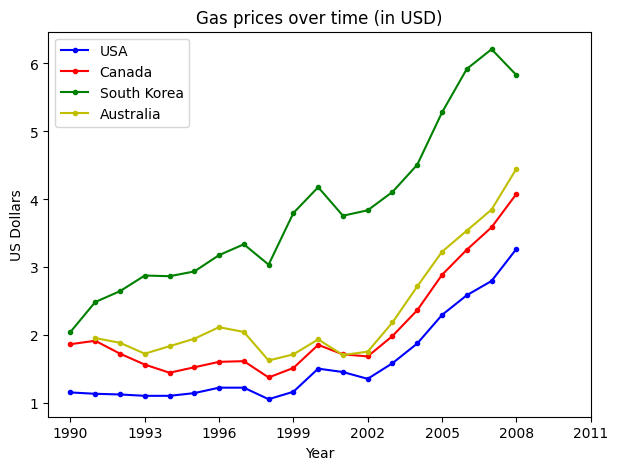

In [2]:
gas = pd.read_csv('gas_prices.csv')
plt.figure(figsize=(7,5),dpi=100)
plt.title("Gas prices over time (in USD)")
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year,gas[country],marker='.',label=country)
plt.plot(gas.Year,gas.USA,'b.-',label='USA')
plt.plot(gas.Year,gas.Canada,'r.-',label='Canada')
plt.plot(gas.Year,gas['South Korea'],'g.-',label='South Korea')
plt.plot(gas.Year,gas['Australia'],'y.-',label='Australia')
plt.xlabel("Year")
plt.ylabel("US Dollars")
plt.xticks(gas.Year[::3].to_list()+[2011])
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.legend()
plt.savefig('Gas_prices_figure.png', dpi=250)
plt.show()

#### Fifa Data

In [3]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


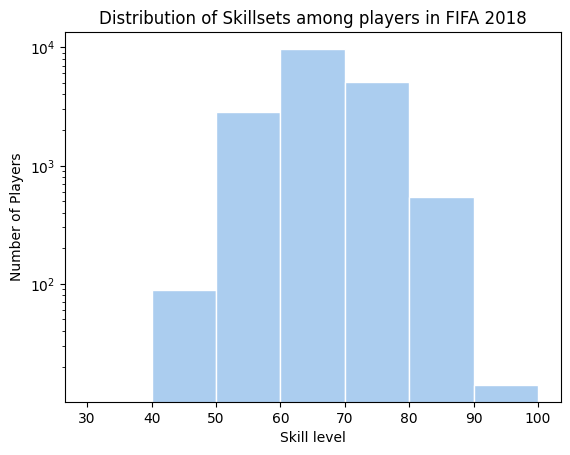

In [131]:
bins=[30,40,50,60,70,80,90,100]
plt.hist(fifa.Overall,log=True, bins=bins,color='#abcdef', edgecolor='white')
plt.xticks(bins)
plt.xlabel("Skill level")
plt.ylabel("Number of Players")
plt.title("Distribution of Skillsets among players in FIFA 2018")
plt.show()

#### Pie Charts

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_47844\2794987877.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left=fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_47844\2794987877.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right=fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]


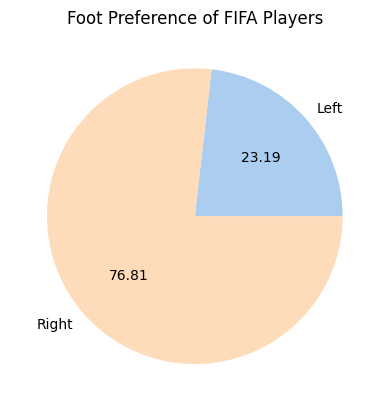

In [5]:
left=fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right=fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]
labels=['Left','Right']
colors=['#abcdef','#fedcba']
plt.pie([left,right], labels=labels, colors=colors, autopct='%.2f')
plt.title("Foot Preference of FIFA Players")
plt.show()

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_47844\4158504601.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light = fifa.loc[fifa['Weight'] < 125].count()[0]
C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_47844\4158504601.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light_medium = fifa.loc[(fifa['Weight'] >= 125) & (fifa.Weight < 150)].count()[0]
C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_47844\4158504601.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

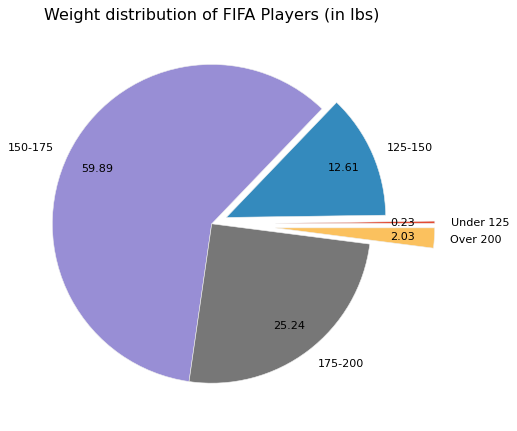

In [53]:
fifa.Weight = [int(x.rstrip('lbs')) if type(x)==str else x for x in fifa.Weight]
light = fifa.loc[fifa['Weight'] < 125].count()[0]
light_medium = fifa.loc[(fifa['Weight'] >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >=150) & (fifa.Weight<175)].count()[0]
medium_heavy = fifa[(fifa.Weight >=175) & (fifa.Weight<200)].count()[0]
heavy = fifa[(fifa.Weight >200)].count()[0]
weights=[light,light_medium,medium,medium_heavy,heavy]
# colors=['#34eb67','#34ebc0','#34b1eb','#b8888d','#f74859']
labels=['Under 125','125-150','150-175','175-200','Over 200']
plt.style.use('ggplot')
explode=(.4,0.1,0,0,.4)
plt.pie(weights,labels=labels,autopct='%.2f', pctdistance=0.8,explode=explode)
plt.title("Weight distribution of FIFA Players (in lbs)")
plt.savefig("Weight distribution of FIFA Players (in lbs)")
plt.show()

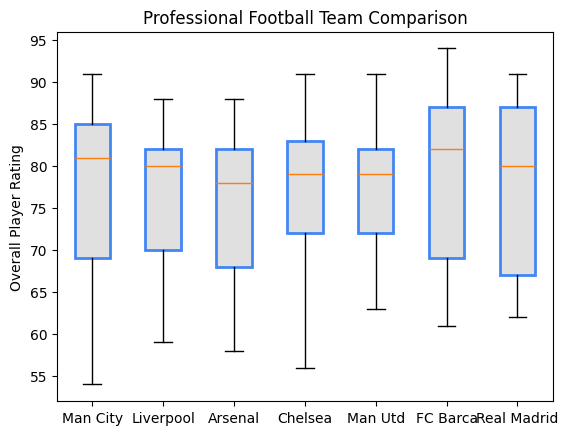

In [125]:
mancity = fifa.loc[fifa.Club == 'Manchester City']['Overall']
liverpool = fifa.loc[fifa.Club == 'Liverpool']['Overall']
arsenal = fifa.loc[fifa.Club == 'Arsenal']['Overall']
chelsea = fifa.loc[fifa.Club == 'Chelsea']['Overall']
manutd = fifa.loc[fifa.Club == 'Manchester United']['Overall']
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
labels = ['Man City', 'Liverpool', 'Arsenal',  'Chelsea','Man Utd', 'FC Barca', 'Real Madrid']
# plt.boxplot([mancity, liverpool, arsenal, chelsea, manutd, barcelona, madrid], 
#             labels=labels,  patch_artist=True, 
#             boxprops={'edgecolor': "#4286f4", 'facecolor':'#e0e0e0'}, 
#             widths=0.5,
#             capwidths=0.2) # , bootstrap=100, notch=True
boxes = plt.boxplot([mancity, liverpool, arsenal, chelsea, manutd, barcelona, madrid],labels=labels,  patch_artist=True)
for box in boxes['boxes']:
    box.set(color= "#4286f4", linewidth=2)
    box.set(facecolor= '#e0e0e0')
plt.title("Professional Football Team Comparison")
plt.ylabel("Overall Player Rating")
# plt.figure(figsize=(10,5),dpi=300)
# plt.figure(figsize=(20,6))
plt.style.use('default')
plt.savefig("Professional Football Team Comparison")
plt.show()